In [194]:
##Data collection

key = "84b02c0f263d56ee9b08c2a0be57fe818765add6"

In [195]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [196]:
df = pdr.get_data_tiingo('AAPL',api_key = key)
df.to_csv('AAPL.csv')

In [197]:
df = pd.read_csv('AAPL.csv')

In [198]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-05-10 00:00:00+00:00,93.42,93.5700,92.110,93.33,33686836,21.814826,21.849853,21.508924,21.793810,134747344,0.00,1.0
1,AAPL,2016-05-11 00:00:00+00:00,92.51,93.5700,92.460,93.48,28719109,21.602329,21.849853,21.590653,21.828837,114876436,0.00,1.0
2,AAPL,2016-05-12 00:00:00+00:00,90.34,92.7800,89.470,92.72,76314690,21.095605,21.665378,20.892448,21.651367,305258760,0.00,1.0
3,AAPL,2016-05-13 00:00:00+00:00,90.52,91.6700,90.000,90.00,44392765,21.137637,21.406178,21.016210,21.016210,177571060,0.00,1.0
4,AAPL,2016-05-16 00:00:00+00:00,93.88,94.3900,91.650,92.39,61259756,21.922242,22.041334,21.401507,21.574307,245039024,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2021-05-03 00:00:00+00:00,132.54,134.0700,131.830,132.04,75135100,132.316441,133.843860,131.607639,131.817284,75135100,0.00,1.0
1254,AAPL,2021-05-04 00:00:00+00:00,127.85,131.4899,126.700,131.19,137564718,127.634352,131.268112,126.486291,130.968718,137564718,0.00,1.0
1255,AAPL,2021-05-05 00:00:00+00:00,128.10,130.4500,127.970,129.20,84000900,127.883930,130.229966,127.754149,128.982075,84000900,0.00,1.0
1256,AAPL,2021-05-06 00:00:00+00:00,129.74,129.7500,127.130,127.89,78128334,129.521164,129.531147,126.915566,127.674284,78128334,0.00,1.0


In [199]:
#only takinnng close column
df1 = df.reset_index()['close']

In [200]:
print(df1)

0        93.42
1        92.51
2        90.34
3        90.52
4        93.88
         ...  
1253    132.54
1254    127.85
1255    128.10
1256    129.74
1257    130.21
Name: close, Length: 1258, dtype: float64


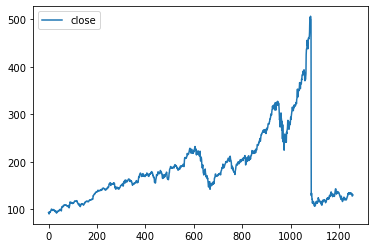

In [201]:
df1.plot()
plt.legend()

In [244]:
df1

array([[0.0074083 ],
       [0.00521948],
       [0.        ],
       ...,
       [0.09082381],
       [0.09476849],
       [0.09589898]])

In [203]:
#converting df1 to array
df1 = np.array(df1)
type(df1)

numpy.ndarray

## SInce LSTM are sensitive to scale of data, we apply MinMAX Scaler

In [204]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1.reshape(-1,1))

In [205]:
print("shape of df1",df1.shape)
df1.transpose()

shape of df1 (1258, 1)


array([[0.0074083 , 0.00521948, 0.        , ..., 0.09082381, 0.09476849,
        0.09589898]])

In [206]:
#splitting dataset into training and test set
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[:training_size,:],df1[training_size:len(df1),:1]

In [207]:
print(training_size),print(test_size)

817
441


(None, None)

In [208]:
print("THis is transpose of training data.It has only one column:\n\n",train_data.transpose())
print("THis is transpose of test data.It has only one column:\n\n",test_data.transpose())

THis is transpose of training data.It has only one column:

 [[0.0074083  0.00521948 0.         0.00043295 0.00851473 0.00757667
  0.01015033 0.00928443 0.01173782 0.01464823 0.018184   0.02232111
  0.02422129 0.02407697 0.02289838 0.01953097 0.01775105 0.01823211
  0.01993987 0.02090198 0.02068551 0.02239327 0.02042093 0.01683704
  0.01712568 0.01635598 0.01734215 0.01200241 0.01144919 0.01339747
  0.01253157 0.01385448 0.00736019 0.004089   0.0078172  0.00976548
  0.01265183 0.01334937 0.01118461 0.01248346 0.01346963 0.01524955
  0.01597114 0.01702946 0.01570655 0.02032471 0.02030066 0.02282622
  0.02292243 0.02313891 0.0218641  0.02001203 0.01683704 0.0152255
  0.03033073 0.03367408 0.0333614  0.03778713 0.03401082 0.03716176
  0.03735418 0.0412267  0.04336741 0.04442574 0.04247745 0.04230908
  0.0429104  0.04603728 0.04579675 0.04541191 0.04507517 0.04574865
  0.04370415 0.04452195 0.04254961 0.04144317 0.03992784 0.03963921
  0.03766687 0.0379074  0.03942273 0.04182802 0.04175586

### For example
* consider Time series data---> Train -120,130,125,140,134,150 . This data are for differennt dates

* Test----> 160,190,154,160,170

`Timesteps = 3`

`    X_train     y_train `            ` y_train        y_test `

` f1  f2  f3      o/p   `            `    f1    f2    f3     o/p()  `           

` 120  130  125     140 `             `    160  190  154      160`

` 130  125  140     134  `             `    190  154  160      170`

In [209]:
# convert an array of values into a dataset matrix

def create_dataset(dataset,time_step=1):
    dataX = []
    dataY = []
    
    for i in range(len(dataset)-time_step-1): #0,1,2,3,4....99(our time_step=100)
        a = dataset[i:(i+time_step),0] # all the values from 0 to i+timestep and number of column =0
        dataX.append(a) #append a
        dataY.append(dataset[i + time_step,0]) # label. i+100,i+101,i+102....
    
    return np.array(dataX),np.array(dataY)

In [210]:
# reshape into X =t,t+1,t+2,+t+3.....t+99 and Y= t+100 
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [211]:
print(X_train[0])
print("X_train shape",X_train.shape)

print("X_test shape",X_test.shape)

print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

[0.0074083  0.00521948 0.         0.00043295 0.00851473 0.00757667
 0.01015033 0.00928443 0.01173782 0.01464823 0.018184   0.02232111
 0.02422129 0.02407697 0.02289838 0.01953097 0.01775105 0.01823211
 0.01993987 0.02090198 0.02068551 0.02239327 0.02042093 0.01683704
 0.01712568 0.01635598 0.01734215 0.01200241 0.01144919 0.01339747
 0.01253157 0.01385448 0.00736019 0.004089   0.0078172  0.00976548
 0.01265183 0.01334937 0.01118461 0.01248346 0.01346963 0.01524955
 0.01597114 0.01702946 0.01570655 0.02032471 0.02030066 0.02282622
 0.02292243 0.02313891 0.0218641  0.02001203 0.01683704 0.0152255
 0.03033073 0.03367408 0.0333614  0.03778713 0.03401082 0.03716176
 0.03735418 0.0412267  0.04336741 0.04442574 0.04247745 0.04230908
 0.0429104  0.04603728 0.04579675 0.04541191 0.04507517 0.04574865
 0.04370415 0.04452195 0.04254961 0.04144317 0.03992784 0.03963921
 0.03766687 0.0379074  0.03942273 0.04182802 0.04175586 0.04334336
 0.03651233 0.03076368 0.0363199  0.04235719 0.0515454  0.06068

In [212]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [213]:
#creating the model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [214]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 226ms/step - loss: 0.0201 - val_loss: 0.0476
Epoch 2/100
12/12 [==============================] - 1s 49ms/step - loss: 0.0027 - val_loss: 0.0279
Epoch 3/100
12/12 [==============================] - 1s 60ms/step - loss: 0.0015 - val_loss: 0.0246
Epoch 4/100
12/12 [==============================] - 1s 57ms/step - loss: 6.7945e-04 - val_loss: 0.0200
Epoch 5/100
12/12 [==============================] - 1s 65ms/step - loss: 4.1262e-04 - val_loss: 0.0213
Epoch 6/100
12/12 [==============================] - 1s 65ms/step - loss: 4.3845e-04 - val_loss: 0.0197
Epoch 7/100
12/12 [==============================] - 1s 54ms/step - loss: 4.3120e-04 - val_loss: 0.0190
Epoch 8/100
12/12 [==============================] - 1s 58ms/step - loss: 3.7307e-04 - val_loss: 0.0185
Epoch 9/100
12/12 [==============================] - 1s 68ms/step - loss: 3.7659e-04 - val_loss: 0.0178
Epoch 10/100
12/12 [==============================] - 1s 58ms/step - loss:

In [215]:
model.save("Apple_Model.h5")

In [216]:
from keras.models import load_model
model = load_model("Apple_Model.h5")

In [217]:
#Let's do prediction and check performance matrix
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)



In [218]:
#Transform back to the original form

#we already did scaling and now need tto do reverse scaling
#SInce we'll be doing RMSE Reverse mean squared error we do reverse scaling

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [219]:
#Calculate RMSE performance matrix
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

170.943134602437

In [220]:
#Test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

254.48303537494178

# plotting

In [221]:
#shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)


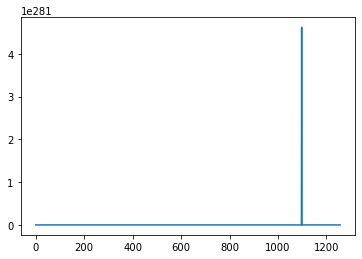

In [222]:
plt.plot(trainPredictPlot)

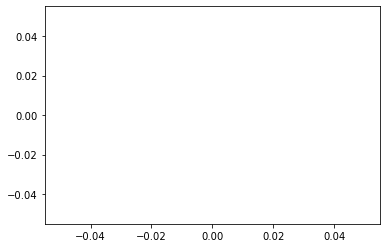

In [223]:
trainPredictPlot[:,:] = np.nan
plt.plot(trainPredictPlot)

#we takr nan value based on the size of df1

In [224]:
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

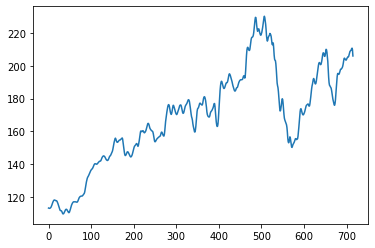

In [225]:
plt.plot(trainPredictPlot[look_back:len(train_predict)+look_back,:] )

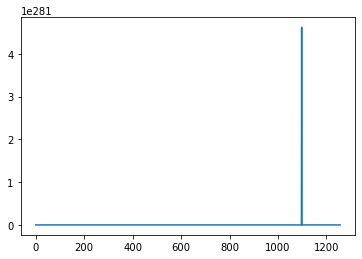

In [226]:
#shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
plt.plot(testPredictPlot)

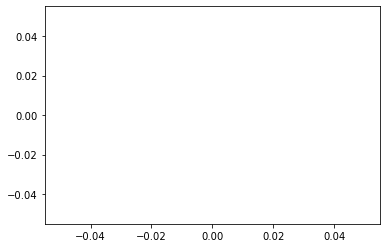

In [227]:
testPredictPlot[:,:] = np.nan
plt.plot(testPredictPlot[:,:])

In [228]:
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

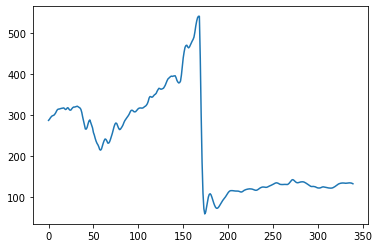

In [229]:
plt.plot(test_predict)

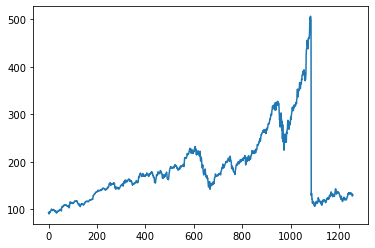

In [230]:
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))



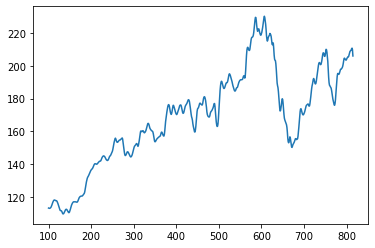

In [231]:
plt.plot(trainPredictPlot
        
        
        
        
        
        
        )

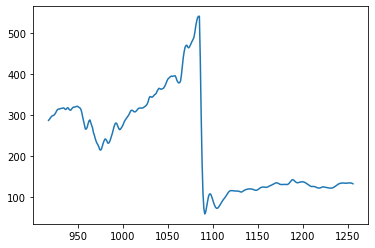

In [232]:
plt.plot(testPredictPlot)

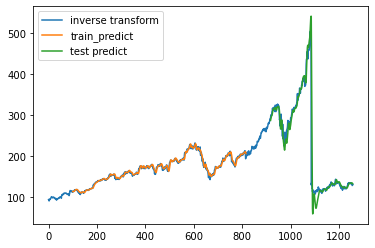

In [233]:
# ALL together
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
#we take all nan value based on the size of df1
trainPredictPlot[look_back:len(train_predict)+look_back,:] =train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan

testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label='inverse transform')
plt.plot(trainPredictPlot,label='train_predict')
plt.plot(testPredictPlot,label='test predict')
plt.legend()
plt.show()




In [234]:
len(test_data)
#suppose the last date is of 09-05-2021 we need to predict for future 30 days from 09-05-2021
# for 09-05-2021 we'll be considering data of last 100 days to train

441

In [235]:
x_input = test_data[341:].reshape(1,-1) #last 100 days
x_input.shape

(1, 100)

In [236]:
type(x_input)

numpy.ndarray

In [237]:
#connverting x_input from numpy.ndarray to list
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [238]:
temp_input
#this is previous 100 days value

[0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.09760673481659649,
 0.10032471437161755,
 0.09294046903187009,
 0.09250751653638006,
 0.09753457606734811,
 0.09277209861695729,
 0.08851473241130486,
 0.09017438364401681,
 0.10027660853878534,
 0.11191822008418523,
 0.11720986169573056,
 0.12647023451593503,
 0.1270475045099218,
 0.12440168370414911,
 0.11244738424533973,
 0.10010823812387254,
 0.10535177390258565,
 0.10739627179795552,
 0.10487071557426336,
 0.11316897173782314,
 0.11165363800360789,
 0.11201443174984965,
 0.10984966927239925,
 0.10835838845460005,
 0.10773301262778107,
 0.1083102826217679,
 0.10306674684305472,
 0.09741431148526758,
 0.09469633193024657,
 0.09508117859290

In [239]:
#demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps = 100
i = 0
while(i<30):
    
    if(len(temp_input)>100): #5. when we add it into the list we'll have 101 element.THen we have to shift from one position and take the reamaining data
        #that is what if condition is doing here
#         print("temp input 1",temp_input)
        x_input = np.array(temp_input[1:]) #if len(temp_input>100) then shift to one position right -->"temp_input[1:]"
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1,n_steps,1))
#         print("x_input is",x_input)
        yhat = model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
#         print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
        
    else:
        x_input = x_input.reshape(1,n_steps,1)  # 1.what ever 100 results we are given we are passing
        #it to the model and doing the predict before that we need to reshape.
        yhat = model.predict(x_input,verbose=0) #2.then we are doing prediction and getting yhat value
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) #4. THen we are also adding it to our previous input i.e. temp_input
        
        
        lst_output.extend(yhat.tolist())  #3.then we are adding yhat value inside our final list i.e lstoutput
        i=i+1
        
print(lst_output)
        
              

[0.09723116]
1 day input [0.09029465 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581
 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641
 0.09397474 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047
 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661
 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738
 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364
 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675
 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596 0.08420926
 0.07372219 0.07437162 0.09007817 0.08365604 0.07629585 0.07165364
 0.07475646 0.06258569 0.07395069 0.07129284 0.07605532 0.0738184
 0.08093806 0.08473842 0.08279014 0.07261575 0.0713169  0.07949489
 0.07745039 0.07155743 0.07276007 0.07425135 0.07468431 0.07110042
 0.07651233 0.07855683 0.08553217 0.08627781 0.09034275 0.09625977
 0.10259771 0.09837643 0.10604931 0.10027661 0.10621768 0.10539988
 0.10703548 0.10287432 0.10381239 0.100

In [240]:
day_new = np.arange(1,101) #100 index kept inide day_new
day_pred = np.arange(101,131) #p 30 indexes kept inside day_pred

In [241]:
len(df1)

1258

In [242]:
df3 = df1.tolist() #convering df1 into list
df3.extend(lst_output) #adding it to lst_output


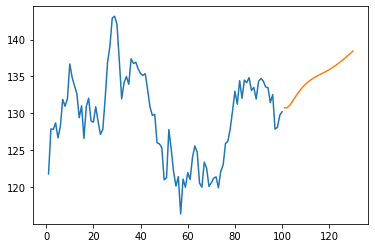

In [247]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:])) #total length of df1 is 1258 but we need 100 previous data
#so from 1158 to 1258 dispay as real data
plt.plot(day_pred,scaler.inverse_transform(lst_output)) #predicted data

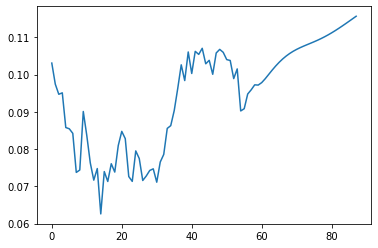

In [249]:
#combined output
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

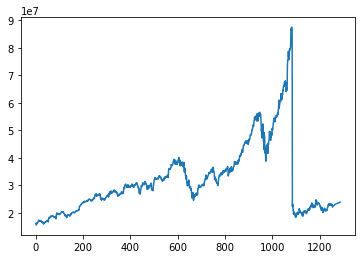

In [254]:
#complete 5 year data + prediction
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [257]:
! git add Apple_DATA.ipynb
! git commit -m "13:42/09-05-2021"
! git push origin main

[main 0a3260b] 13:41/09-05-2021
 2 files changed, 1259 insertions(+)
 create mode 100644 RNN+LSTM(AAPL)/AAPL.csv
 create mode 100644 RNN+LSTM(AAPL)/Apple_Model.h5


remote: This repository moved. Please use the new location:        
remote:   https://github.com/sumit-mandal/STOCK_PRED_RNN-LSTM.git        
To https://github.com/sumit-mandal/STOCK_PRED.git
   37f2d50..0a3260b  main -> main
